# Figuras FitARMA

#### Cargamos las librerias y preparamos los datos

In [29]:
library(ggplot2)
library(zoo)
library(forecast)
library(tseries)
library(FitARMA)

# Cargamos y prepraramos los datos
datos <- read.csv('monthly-traffic-fatalities-in-on.csv')
accidentes <- ts(datos, start = c(1960, 1), frequency = 12)

decomposition <- decompose(accidentes, type = 'additive')
accidentes.adj <- seasadj(decomposition) # Forecast
acc.train.adj <- window(accidentes.adj, start = c(1960,1), end = c(1973,12))
acc.test.adj <- window(accidentes.adj, start = c(1974,1))

accidentes.dif.adj <- diff(accidentes.adj) 
acc.train.dif.adj <- window(accidentes.dif.adj, start = c(1960,2), end = c(1973,12)) # Perdemos una observación
acc.test.dif.adj <- window(accidentes.dif.adj, start = c(1974,1))

#### Figura 30

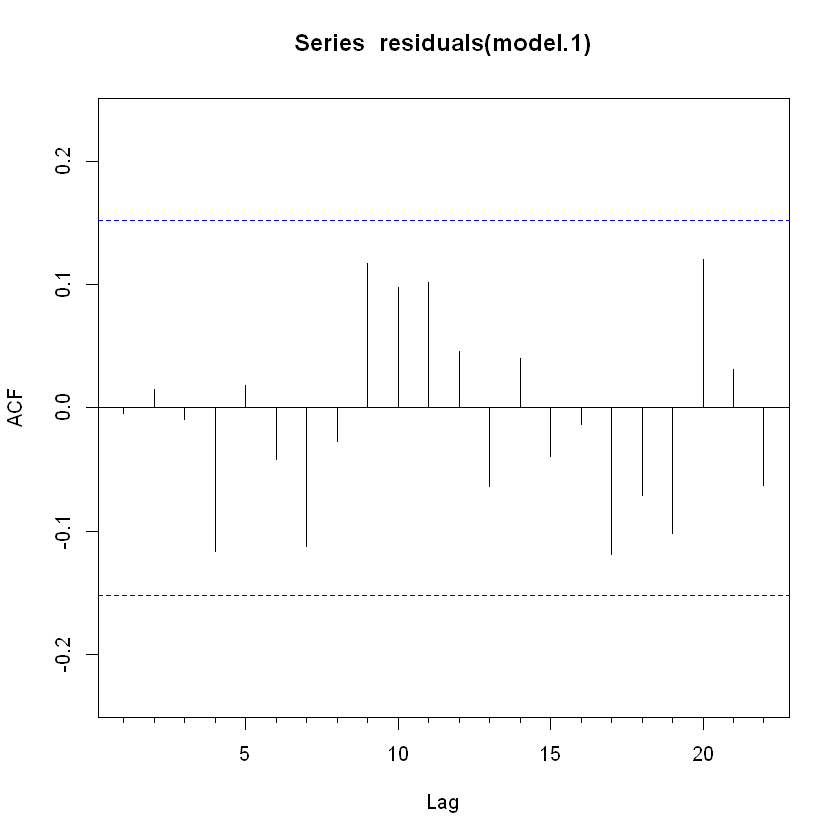

In [30]:
model.1 <- FitARMA(acc.train.dif.adj, order = c(2,0,1))
Acf(residuals(model.1))

#### Figura 31

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


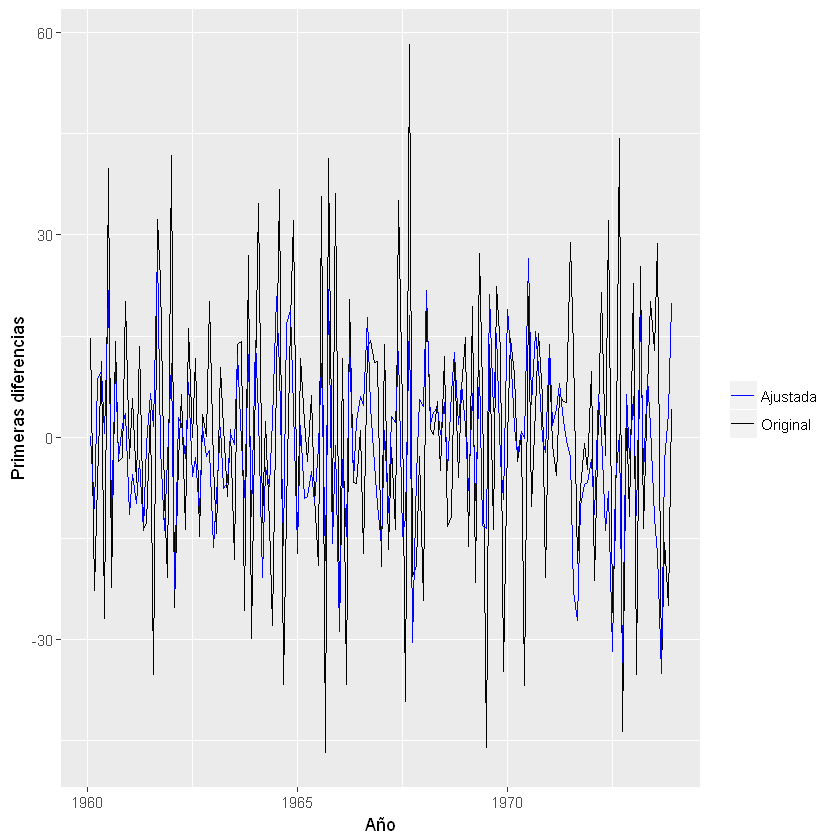

In [31]:
model <- FitARMA(acc.train.dif.adj, order = c(2,0,1), MeanMLEQ =  TRUE)
figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)), y = coredata(as.zoo(acc.train.dif.adj)), colour = 'Original')) +
  geom_line(aes(x = index(as.zoo(fitted(model))), y = coredata(as.zoo(fitted(model))), colour = 'Ajustada')) +
  scale_color_manual(name = '', values = c('Original' = 'black', 'Ajustada' = 'blue'),
                     labels = c('Ajustada', 'Original')) +
  xlab('Año') + ylab('Primeras diferencias')
figura

#### Figura 32

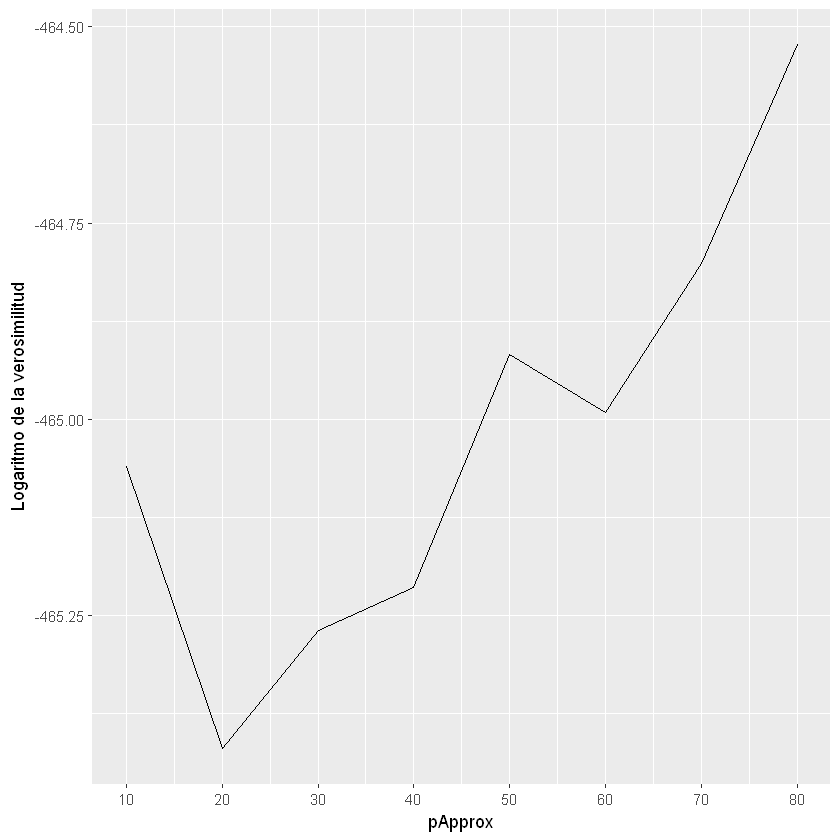

In [32]:
pApprox.metrics <- c()
pApprox.values <- seq(10, 80, 10)

for (i in pApprox.values) {
  model <- FitARMA(acc.train.dif.adj, order = c(2,0,1), MeanMLEQ = TRUE, pApprox = i)
  pApprox.metrics <- c(pApprox.metrics, model$loglikelihood)
}
pApp <- data.frame(pApprox = pApprox.values, LogLikelihood = pApprox.metrics)

figura <- ggplot() +
  geom_line(data = pApp, aes(x = pApprox, y = LogLikelihood)) +
  xlab('pApprox') + ylab('Logaritmo de la verosimilitud') +
  scale_x_continuous(breaks = pApprox.values)
figura

#### Figura 33

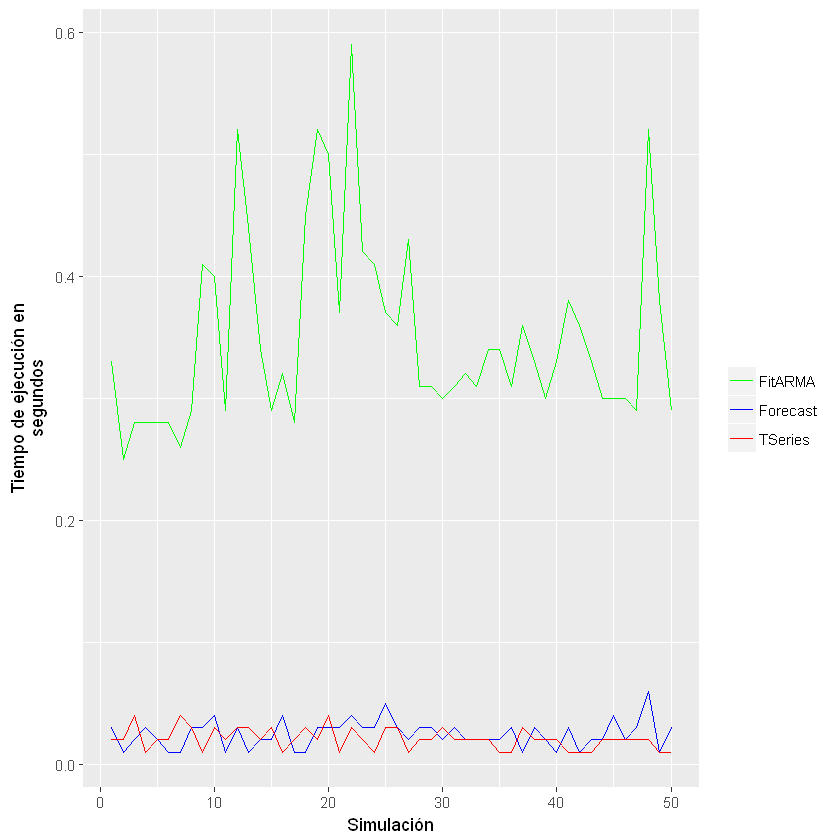

In [33]:
set.seed(1006)

p <- 2; q <- 1
timing.forecast <- c()
timing.tseries <- c()
timing.fitarma <- c()

for (i in 1:50) {
  timing.fitarma <- c(timing.fitarma,
                      as.numeric(system.time(FitARMA(acc.train.dif.adj, order = c(p,0,q)))[3]))
  
  timing.forecast <- c(timing.forecast,
                       as.numeric(system.time(Arima(acc.train.dif.adj, order = c(p,0,q)))[3]))
  
  timing.tseries <- c(timing.tseries,
                      as.numeric(system.time(arma(acc.train.dif.adj, order = c(p, q)))[3]))
}


figura <- ggplot() +
  geom_line(aes(x = 1:length(timing.forecast), y = timing.forecast, colour = 'Forecast')) +
  geom_line(aes(x = 1:length(timing.tseries), y = timing.tseries, colour = 'TSeries')) +
  geom_line(aes(x = 1:length(timing.fitarma), y = timing.fitarma, colour = 'FitARMA')) +
  xlab('Simulación') + ylab('Tiempo de ejecución en\nsegundos') +
  scale_color_manual(name = '', values = c('TSeries' = 'red', 'Forecast' = 'blue',
                                                  'FitARMA' = 'green'),
                     labels = c('FitARMA', 'Forecast', 'TSeries'))
figura